In [4]:
pip install midi2audio

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pretty_midi

     |████████████████████████████████| 5.6 MB 249 kB/s eta 0:00:01
     |████████████████████████████████| 51 kB 22.8 MB/s eta 0:00:01
  Created wheel for pretty-midi: filename=pretty_midi-0.2.9-py3-none-any.whl size=5591952 sha256=18b4c838aeeeb32a412b8741f8434655f926545927eeaef797d5a830f332576d
  Stored in directory: /home/alessandro/.cache/pip/wheels/2a/5a/e3/30eeb9a99350f3f7e21258fcb132743eef1a4f49b3505e76b6
Successfully built pretty-midi
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install fluidsynth

  Created wheel for fluidsynth: filename=fluidsynth-0.2-py3-none-any.whl size=4512 sha256=3b438c5dd1f398852547461ceba2c3a1ccedee35c246b82bc4528df72f6986e7
  Stored in directory: /home/alessandro/.cache/pip/wheels/d4/e6/bf/921b2deb780e2681b0e1626a13995e504dbbd455b47e7eedd4
Successfully built fluidsynth
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install -U pip

     |████████████████████████████████| 2.1 MB 498 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install -U matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 5.1 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 10.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install librosa

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 463.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 5.7 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 11.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 14.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 16.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 13.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 13.9 MB/s eta 0:00:0000:0100:01
  Create

In [23]:
import torch
from torch import Tensor,relu

import torch.nn as nn
from torch.nn import LayerNorm, MultiheadAttention, Linear, Dropout, ModuleList, Module

import torch.nn.functional as F
from torch.nn.init import xavier_uniform_

import numpy as np

import math, copy

import dataclasses

from typing import Mapping, Sequence, Union, Optional, Any, Callable

import pretty_midi

import matplotlib.pyplot as plt

import librosa.display
from IPython.display import Audio

import copy

import mido

import matplotlib.pyplot as plt

import torchaudio
import torchaudio.functional as Fa
import torchaudio.transforms as T
from torchaudio.utils import download_asset

import torchvision
from torchvision import transforms
from midi2audio import FluidSynth


In [17]:
class Transformermio(nn.Module):
    """Args:
        d_model: the number of expected features in the encoder/decoder inputs (default=512).
        nhead: the number of heads in the multiheadattention models (default=8).
        num_encoder_layers: the number of sub-encoder-layers in the encoder (default=6).
        num_decoder_layers: the number of sub-decoder-layers in the decoder (default=6).
        dim_feedforward: the dimension of the feedforward network model (default=2048).
        dropout: the dropout value (default=0.1).
        activation: the activation function of encoder/decoder intermediate layer, can be a string
            ("relu" or "gelu") or a unary callable. Default: relu
        custom_encoder: custom encoder (default=None).
        custom_decoder: custom decoder (default=None).
        layer_norm_eps: the eps value in layer normalization components (default=1e-5).
        batch_first: If ``True``, then the input and output tensors are provided
            as (batch, seq, feature). Default: ``False`` (seq, batch, feature).
        norm_first: if ``True``, encoder and decoder layers will perform LayerNorms before
            other attention and feedforward operations, otherwise after. Default: ``False`` (after).

    Examples::
        >>> transformer_model = nn.Transformer(nhead=16, num_encoder_layers=12)
        >>> src = torch.rand((10, 32, 512))
        >>> tgt = torch.rand((20, 32, 512))
        >>> out = transformer_model(src, tgt)

    Note: A full example to apply nn.Transformer module for the word language model is available in
    https://github.com/pytorch/examples/tree/master/word_language_model
    """

    def __init__(self, d_model: int = 2048,  nhead: int = 6, num_encoder_layers: int = 8,
                 num_decoder_layers: int = 8, dim_feedforward: int = 1024, dropout: float = 0.1,
                 activation: Union[str, Callable[[Tensor], Tensor]] = F.relu,
                 custom_encoder: Optional[Any] = None, custom_decoder: Optional[Any] = None,
                 layer_norm_eps: float = 1e-5, batch_first: bool = False, norm_first: bool = False,
                 device=None, dtype=None) -> None:
        factory_kwargs = {'device': device, 'dtype': dtype}
        super(Transformermio, self).__init__()
        self.d_model = d_model
        if custom_encoder is not None:
            self.encoder = custom_encoder
        else:
            encoder_layer = TransformerEncoderLayer(d_model, nhead, dim_feedforward, dropout,
                                                    activation, layer_norm_eps, batch_first, norm_first,
                                                    **factory_kwargs)
            encoder_norm = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)
            self.encoder = TransformerEncoder(encoder_layer, num_encoder_layers, encoder_norm)
            

        if custom_decoder is not None:
            self.decoder = custom_decoder
        else:
            decoder_layer = TransformerDecoderLayer(d_model, nhead, dim_feedforward, dropout,
                                                    activation, layer_norm_eps, batch_first, norm_first,
                                                    **factory_kwargs)
            decoder_norm = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)
            self.decoder = TransformerDecoder(decoder_layer, num_decoder_layers, decoder_norm)

        self._reset_parameters()

        #self.d_model = d_model
        self.nhead = nhead

        self.batch_first = batch_first

    def forward(self, src: Tensor, tgt: Tensor, src_mask: Optional[Tensor] = None, tgt_mask: Optional[Tensor] = None,
                memory_mask: Optional[Tensor] = None, src_key_padding_mask: Optional[Tensor] = None,
                tgt_key_padding_mask: Optional[Tensor] = None, memory_key_padding_mask: Optional[Tensor] = None) -> Tensor:
        r"""Take in and process masked source/target sequences.

        Args:
            src: the sequence to the encoder (required).
            tgt: the sequence to the decoder (required).
            src_mask: the additive mask for the src sequence (optional).
            tgt_mask: the additive mask for the tgt sequence (optional).
            memory_mask: the additive mask for the encoder output (optional).
            src_key_padding_mask: the ByteTensor mask for src keys per batch (optional).
            tgt_key_padding_mask: the ByteTensor mask for tgt keys per batch (optional).
            memory_key_padding_mask: the ByteTensor mask for memory keys per batch (optional).

        Shape:
            - src: :math:`(S, E)` for unbatched input, :math:`(S, N, E)` if `batch_first=False` or
              `(N, S, E)` if `batch_first=True`.
            - tgt: :math:`(T, E)` for unbatched input, :math:`(T, N, E)` if `batch_first=False` or
              `(N, T, E)` if `batch_first=True`.
            - src_mask: :math:`(S, S)` or :math:`(N\cdot\text{num\_heads}, S, S)`.
            - tgt_mask: :math:`(T, T)` or :math:`(N\cdot\text{num\_heads}, T, T)`.
            - memory_mask: :math:`(T, S)`.
            - src_key_padding_mask: :math:`(S)` for unbatched input otherwise :math:`(N, S)`.
            - tgt_key_padding_mask: :math:`(T)` for unbatched input otherwise :math:`(N, T)`.
            - memory_key_padding_mask: :math:`(S)` for unbatched input otherwise :math:`(N, S)`.

            Note: [src/tgt/memory]_mask ensures that position i is allowed to attend the unmasked
            positions. If a ByteTensor is provided, the non-zero positions are not allowed to attend
            while the zero positions will be unchanged. If a BoolTensor is provided, positions with ``True``
            are not allowed to attend while ``False`` values will be unchanged. If a FloatTensor
            is provided, it will be added to the attention weight.
            [src/tgt/memory]_key_padding_mask provides specified elements in the key to be ignored by
            the attention. If a ByteTensor is provided, the non-zero positions will be ignored while the zero
            positions will be unchanged. If a BoolTensor is provided, the positions with the
            value of ``True`` will be ignored while the position with the value of ``False`` will be unchanged.

            - output: :math:`(T, E)` for unbatched input, :math:`(T, N, E)` if `batch_first=False` or
              `(N, T, E)` if `batch_first=True`.

            Note: Due to the multi-head attention architecture in the transformer model,
            the output sequence length of a transformer is same as the input sequence
            (i.e. target) length of the decoder.

            where S is the source sequence length, T is the target sequence length, N is the
            batch size, E is the feature number

        Examples:
            >>> # xdoctest: +SKIP
            >>> output = transformer_model(src, tgt, src_mask=src_mask, tgt_mask=tgt_mask)
        """

        is_batched = src.dim() == 3
        if not self.batch_first and src.size(1) != tgt.size(1) and is_batched:
            raise RuntimeError("the batch number of src and tgt must be equal")
        elif self.batch_first and src.size(0) != tgt.size(0) and is_batched:
            raise RuntimeError("the batch number of src and tgt must be equal")
        
        if src.size(-1) != self.d_model or tgt.size(-1) != self.d_model:
            raise RuntimeError("the feature number of src and tgt must be equal to d_model")

        memory = self.encoder(src, mask=src_mask, src_key_padding_mask=src_key_padding_mask)
        
        output = self.decoder(tgt, memory, tgt_mask=tgt_mask, memory_mask=memory_mask,
                              tgt_key_padding_mask=tgt_key_padding_mask,
                              memory_key_padding_mask=memory_key_padding_mask)
        return output


    @staticmethod
    def generate_square_subsequent_mask(sz: int, device='cpu') -> Tensor:
        r"""Generate a square mask for the sequence. The masked positions are filled with float('-inf').
            Unmasked positions are filled with float(0.0).
        """
        return torch.triu(torch.full((sz, sz), float('-inf'), device=device), diagonal=1)


    def _reset_parameters(self):
        r"""Initiate parameters in the transformer model."""

        for p in self.parameters():
            if p.dim() > 1:
                xavier_uniform_(p)



class TransformerEncoder(Module):
    r"""TransformerEncoder is a stack of N encoder layers. Users can build the
    BERT(https://arxiv.org/abs/1810.04805) model with corresponding parameters.

    Args:
        encoder_layer: an instance of the TransformerEncoderLayer() class (required).
        num_layers: the number of sub-encoder-layers in the encoder (required).
        norm: the layer normalization component (optional).
        enable_nested_tensor: if True, input will automatically convert to nested tensor
            (and convert back on output). This will improve the overall performance of
            TransformerEncoder when padding rate is high. Default: ``True`` (enabled).

    Examples::
        >>> encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8)
        >>> transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=6)
        >>> src = torch.rand(10, 32, 512)
        >>> out = transformer_encoder(src)
    """
    __constants__ = ['norm']

    def __init__(self, encoder_layer, num_layers, norm=None, enable_nested_tensor=True, mask_check=True):
        super(TransformerEncoder, self).__init__()
        self.layers = _get_clones(encoder_layer, num_layers)
        self.num_layers = num_layers
        self.norm = norm
        self.enable_nested_tensor = enable_nested_tensor
        self.mask_check = mask_check

    def forward(self, src: Tensor, mask: Optional[Tensor] = None, src_key_padding_mask: Optional[Tensor] = None) -> Tensor:
        r"""Pass the input through the encoder layers in turn.

        Args:
            src: the sequence to the encoder (required).
            mask: the mask for the src sequence (optional).
            src_key_padding_mask: the mask for the src keys per batch (optional).

        Shape:
            see the docs in Transformer class.
        """
        if src_key_padding_mask is not None:
            _skpm_dtype = src_key_padding_mask.dtype
            if _skpm_dtype != torch.bool and not torch.is_floating_point(src_key_padding_mask):
                raise AssertionError(
                    "only bool and floating types of key_padding_mask are supported")
        output = src
        convert_to_nested = False
        first_layer = self.layers[0]
        src_key_padding_mask_for_layers = src_key_padding_mask
        why_not_sparsity_fast_path = ''
        str_first_layer = "self.layers[0]"
        if not isinstance(first_layer, torch.nn.TransformerEncoderLayer):
            why_not_sparsity_fast_path = f"{str_first_layer} was not TransformerEncoderLayer"
        elif first_layer.norm_first :
            why_not_sparsity_fast_path = f"{str_first_layer}.norm_first was True"
        elif first_layer.training:
            why_not_sparsity_fast_path = f"{str_first_layer} was in training mode"
        elif not first_layer.self_attn.batch_first:
            why_not_sparsity_fast_path = f" {str_first_layer}.self_attn.batch_first was not True"
        elif not first_layer.self_attn._qkv_same_embed_dim:
            why_not_sparsity_fast_path = f"{str_first_layer}.self_attn._qkv_same_embed_dim was not True"
        elif not first_layer.activation_relu_or_gelu:
            why_not_sparsity_fast_path = f" {str_first_layer}.activation_relu_or_gelu was not True"
        elif not (first_layer.norm1.eps == first_layer.norm2.eps) :
            why_not_sparsity_fast_path = f"{str_first_layer}.norm1.eps was not equal to {str_first_layer}.norm2.eps"
        elif not src.dim() == 3:
            why_not_sparsity_fast_path = f"input not batched; expected src.dim() of 3 but got {src.dim()}"
        elif not self.enable_nested_tensor:
            why_not_sparsity_fast_path = "enable_nested_tensor was not True"
        elif src_key_padding_mask is None:
            why_not_sparsity_fast_path = "src_key_padding_mask was None"
        elif (((not hasattr(self, "mask_check")) or self.mask_check)
                and not torch._nested_tensor_from_mask_left_aligned(src, src_key_padding_mask.logical_not())):
            why_not_sparsity_fast_path = "mask_check enabled, and src and src_key_padding_mask was not left aligned"
        elif output.is_nested:
            why_not_sparsity_fast_path = "NestedTensor input is not supported"
        elif mask is not None:
            why_not_sparsity_fast_path = "src_key_padding_mask and mask were both supplied"
        elif first_layer.self_attn.num_heads % 2 == 1:
            why_not_sparsity_fast_path = "num_head is odd"
        elif torch.is_autocast_enabled():
            why_not_sparsity_fast_path = "autocast is enabled"

        if not why_not_sparsity_fast_path:
            tensor_args = (
                src,
                first_layer.self_attn.in_proj_weight,
                first_layer.self_attn.in_proj_bias,
                first_layer.self_attn.out_proj.weight,
                first_layer.self_attn.out_proj.bias,
                first_layer.norm1.weight,
                first_layer.norm1.bias,
                first_layer.norm2.weight,
                first_layer.norm2.bias,
                first_layer.linear1.weight,
                first_layer.linear1.bias,
                first_layer.linear2.weight,
                first_layer.linear2.bias,
            )

            if torch.overrides.has_torch_function(tensor_args):
                why_not_sparsity_fast_path = "some Tensor argument has_torch_function"
            elif not (src.is_cuda or 'cpu' in str(src.device)):
                why_not_sparsity_fast_path = "src is neither CUDA nor CPU"
            elif torch.is_grad_enabled() and any(x.requires_grad for x in tensor_args):
                why_not_sparsity_fast_path = ("grad is enabled and at least one of query or the "
                                              "input/output projection weights or biases requires_grad")

            if (not why_not_sparsity_fast_path) and (src_key_padding_mask is not None):
                convert_to_nested = True
                output = torch._nested_tensor_from_mask(output, src_key_padding_mask.logical_not(), mask_check=False)
                src_key_padding_mask_for_layers = None

        for mod in self.layers:
            output = mod(output, src_mask=mask, src_key_padding_mask=src_key_padding_mask_for_layers)

        if convert_to_nested:
            output = output.to_padded_tensor(0.)

        if self.norm is not None:
            output = self.norm(output)

        return output



class TransformerDecoder(Module):
    r"""TransformerDecoder is a stack of N decoder layers

    Args:
        decoder_layer: an instance of the TransformerDecoderLayer() class (required).
        num_layers: the number of sub-decoder-layers in the decoder (required).
        norm: the layer normalization component (optional).

    Examples::
        >>> decoder_layer = nn.TransformerDecoderLayer(d_model=512, nhead=8)
        >>> transformer_decoder = nn.TransformerDecoder(decoder_layer, num_layers=6)
        >>> memory = torch.rand(10, 32, 512)
        >>> tgt = torch.rand(20, 32, 512)
        >>> out = transformer_decoder(tgt, memory)
    """
    __constants__ = ['norm']

    def __init__(self, decoder_layer, num_layers, norm=None):
        super(TransformerDecoder, self).__init__()
        self.layers = _get_clones(decoder_layer, num_layers)
        self.num_layers = num_layers
        self.norm = norm

    def forward(self, tgt: Tensor, memory: Tensor, tgt_mask: Optional[Tensor] = None,
                memory_mask: Optional[Tensor] = None, tgt_key_padding_mask: Optional[Tensor] = None,
                memory_key_padding_mask: Optional[Tensor] = None) -> Tensor:
        r"""Pass the inputs (and mask) through the decoder layer in turn.

        Args:
            tgt: the sequence to the decoder (required).
            memory: the sequence from the last layer of the encoder (required).
            tgt_mask: the mask for the tgt sequence (optional).
            memory_mask: the mask for the memory sequence (optional).
            tgt_key_padding_mask: the mask for the tgt keys per batch (optional).
            memory_key_padding_mask: the mask for the memory keys per batch (optional).

        Shape:
            see the docs in Transformer class.
        """
        output = tgt

        for mod in self.layers:
            output = mod(output, memory, tgt_mask=tgt_mask,
                         memory_mask=memory_mask,
                         tgt_key_padding_mask=tgt_key_padding_mask,
                         memory_key_padding_mask=memory_key_padding_mask)

        if self.norm is not None:
            output = self.norm(output)

        return output


class TransformerEncoderLayer(Module):
    r"""TransformerEncoderLayer is made up of self-attn and feedforward network.
    This standard encoder layer is based on the paper "Attention Is All You Need".
    Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N Gomez,
    Lukasz Kaiser, and Illia Polosukhin. 2017. Attention is all you need. In Advances in
    Neural Information Processing Systems, pages 6000-6010. Users may modify or implement
    in a different way during application.

    Args:
        d_model: the number of expected features in the input (required).
        nhead: the number of heads in the multiheadattention models (required).
        dim_feedforward: the dimension of the feedforward network model (default=2048).
        dropout: the dropout value (default=0.1).
        activation: the activation function of the intermediate layer, can be a string
            ("relu" or "gelu") or a unary callable. Default: relu
        layer_norm_eps: the eps value in layer normalization components (default=1e-5).
        batch_first: If ``True``, then the input and output tensors are provided
            as (batch, seq, feature). Default: ``False`` (seq, batch, feature).
        norm_first: if ``True``, layer norm is done prior to attention and feedforward
            operations, respectively. Otherwise it's done after. Default: ``False`` (after).

    Examples::
        >>> encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8)
        >>> src = torch.rand(10, 32, 512)
        >>> out = encoder_layer(src)

    Alternatively, when ``batch_first`` is ``True``:
        >>> encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8, batch_first=True)
        >>> src = torch.rand(32, 10, 512)
        >>> out = encoder_layer(src)

    Fast path:
        forward() will use a special optimized implementation if all of the following
        conditions are met:

        - Either autograd is disabled (using ``torch.inference_mode`` or ``torch.no_grad``) or no tensor
          argument ``requires_grad``
        - training is disabled (using ``.eval()``)
        - batch_first is ``True`` and the input is batched (i.e., ``src.dim() == 3``)
        - activation is one of: ``"relu"``, ``"gelu"``, ``torch.functional.relu``, or ``torch.functional.gelu``
        - at most one of ``src_mask`` and ``src_key_padding_mask`` is passed
        - if src is a `NestedTensor <https://pytorch.org/docs/stable/nested.html>`_, neither ``src_mask``
          nor ``src_key_padding_mask`` is passed
        - the two ``LayerNorm`` instances have a consistent ``eps`` value (this will naturally be the case
          unless the caller has manually modified one without modifying the other)

        If the optimized implementation is in use, a
        `NestedTensor <https://pytorch.org/docs/stable/nested.html>`_ can be
        passed for ``src`` to represent padding more efficiently than using a padding
        mask. In this case, a `NestedTensor <https://pytorch.org/docs/stable/nested.html>`_ will be
        returned, and an additional speedup proportional to the fraction of the input that
        is padding can be expected.
    """
    __constants__ = ['batch_first', 'norm_first']

    def __init__(self, d_model: int, nhead: int, dim_feedforward: int = 1024, dropout: float = 0.1,
                 activation: Union[str, Callable[[Tensor], Tensor]] = F.relu,
                 layer_norm_eps: float = 1e-5, batch_first: bool = False, norm_first: bool = True,
                 device=None, dtype=None) -> None:
        factory_kwargs = {'device': device, 'dtype': dtype}
        super(TransformerEncoderLayer, self).__init__()
        self.self_attn = MultiheadAttention(d_model, nhead, dropout=dropout, batch_first=batch_first,
                                            **factory_kwargs)
        # Implementation of Feedforward model
        self.linear1 = Linear(d_model, dim_feedforward, **factory_kwargs)
        self.dropout = Dropout(dropout)
        self.linear2 = Linear(dim_feedforward, d_model, **factory_kwargs)

        self.norm_first = norm_first
        self.norm1 = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)
        self.norm2 = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)
        self.dropout1 = Dropout(dropout)
        self.dropout2 = Dropout(dropout)

        # Legacy string support for activation function.
        if isinstance(activation, str):
            activation = _get_activation_fn(activation)

        # We can't test self.activation in forward() in TorchScript,
        # so stash some information about it instead.
        if activation is F.relu or isinstance(activation, torch.nn.ReLU):
            self.activation_relu_or_gelu = 1
        elif activation is F.gelu or isinstance(activation, torch.nn.GELU):
            self.activation_relu_or_gelu = 2
        else:
            self.activation_relu_or_gelu = 0
        self.activation = activation

    def __setstate__(self, state):
        super(TransformerEncoderLayer, self).__setstate__(state)
        if not hasattr(self, 'activation'):
            self.activation = F.relu


    def forward(self, src: Tensor, src_mask: Optional[Tensor] = None,
                src_key_padding_mask: Optional[Tensor] = None) -> Tensor:
        r"""Pass the input through the encoder layer.

        Args:
            src: the sequence to the encoder layer (required).
            src_mask: the mask for the src sequence (optional).
            src_key_padding_mask: the mask for the src keys per batch (optional).

        Shape:
            see the docs in Transformer class.
        """

        if src_key_padding_mask is not None:
            _skpm_dtype = src_key_padding_mask.dtype
            if _skpm_dtype != torch.bool and not torch.is_floating_point(src_key_padding_mask):
                raise AssertionError(
                    "only bool and floating types of key_padding_mask are supported")
        # see Fig. 1 of https://arxiv.org/pdf/2002.04745v1.pdf
        why_not_sparsity_fast_path = ''
        if not src.dim() == 3:
            why_not_sparsity_fast_path = f"input not batched; expected src.dim() of 3 but got {src.dim()}"
        elif self.training:
            why_not_sparsity_fast_path = "training is enabled"
        elif not self.self_attn.batch_first :
            why_not_sparsity_fast_path = "self_attn.batch_first was not True"
        elif not self.self_attn._qkv_same_embed_dim :
            why_not_sparsity_fast_path = "self_attn._qkv_same_embed_dim was not True"
        elif not self.activation_relu_or_gelu:
            why_not_sparsity_fast_path = "activation_relu_or_gelu was not True"
        elif not (self.norm1.eps == self.norm2.eps):
            why_not_sparsity_fast_path = "norm1.eps is not equal to norm2.eps"
        elif src_mask is not None:
            why_not_sparsity_fast_path = "src_mask is not supported for fastpath"
        elif src.is_nested and src_key_padding_mask is not None:
            why_not_sparsity_fast_path = "src_key_padding_mask is not supported with NestedTensor input for fastpath"
        elif self.self_attn.num_heads % 2 == 1:
            why_not_sparsity_fast_path = "num_head is odd"
        elif torch.is_autocast_enabled():
            why_not_sparsity_fast_path = "autocast is enabled"

        if not why_not_sparsity_fast_path:
            tensor_args = (
                src,
                self.self_attn.in_proj_weight,
                self.self_attn.in_proj_bias,
                self.self_attn.out_proj.weight,
                self.self_attn.out_proj.bias,
                self.norm1.weight,
                self.norm1.bias,
                self.norm2.weight,
                self.norm2.bias,
                self.linear1.weight,
                self.linear1.bias,
                self.linear2.weight,
                self.linear2.bias,
            )

            # We have to use list comprehensions below because TorchScript does not support
            # generator expressions.
            if torch.overrides.has_torch_function(tensor_args):
                why_not_sparsity_fast_path = "some Tensor argument has_torch_function"
            elif not all((x.is_cuda or 'cpu' in str(x.device)) for x in tensor_args):
                why_not_sparsity_fast_path = "some Tensor argument is neither CUDA nor CPU"
            elif torch.is_grad_enabled() and any(x.requires_grad for x in tensor_args):
                why_not_sparsity_fast_path = ("grad is enabled and at least one of query or the "
                                              "input/output projection weights or biases requires_grad")

            if not why_not_sparsity_fast_path:
                return torch._transformer_encoder_layer_fwd(
                    src,
                    self.self_attn.embed_dim,
                    self.self_attn.num_heads,
                    self.self_attn.in_proj_weight,
                    self.self_attn.in_proj_bias,
                    self.self_attn.out_proj.weight,
                    self.self_attn.out_proj.bias,
                    self.activation_relu_or_gelu == 2,
                    self.norm_first,
                    self.norm1.eps,
                    self.norm1.weight,
                    self.norm1.bias,
                    self.norm2.weight,
                    self.norm2.bias,
                    self.linear1.weight,
                    self.linear1.bias,
                    self.linear2.weight,
                    self.linear2.bias,
                    # TODO: if src_mask and src_key_padding_mask merge to single 4-dim mask
                    src_mask if src_mask is not None else src_key_padding_mask,
                    1 if src_key_padding_mask is not None else
                    0 if src_mask is not None else
                    None,
                )


        x = src
        if self.norm_first:
            x = x + self._sa_block(self.norm1(x), src_mask, src_key_padding_mask)
            x = x + self._ff_block(self.norm2(x))
        else:
            x = self.norm1(x + self._sa_block(x, src_mask, src_key_padding_mask))
            x = self.norm2(x + self._ff_block(x))

        return x


    # self-attention block
    def _sa_block(self, x: Tensor,
                  attn_mask: Optional[Tensor], key_padding_mask: Optional[Tensor]) -> Tensor:
        x = self.self_attn(x, x, x,
                           attn_mask=attn_mask,
                           key_padding_mask=key_padding_mask,
                           need_weights=False)[0]
        return self.dropout1(x)

    # feed forward block
    def _ff_block(self, x: Tensor) -> Tensor:
        x = self.linear2(self.dropout(self.activation(self.linear1(x))))
        return self.dropout2(x)



class TransformerDecoderLayer(Module):
    r"""TransformerDecoderLayer is made up of self-attn, multi-head-attn and feedforward network.
    This standard decoder layer is based on the paper "Attention Is All You Need".
    Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N Gomez,
    Lukasz Kaiser, and Illia Polosukhin. 2017. Attention is all you need. In Advances in
    Neural Information Processing Systems, pages 6000-6010. Users may modify or implement
    in a different way during application.

    Args:
        d_model: the number of expected features in the input (required).
        nhead: the number of heads in the multiheadattention models (required).
        dim_feedforward: the dimension of the feedforward network model (default=2048).
        dropout: the dropout value (default=0.1).
        activation: the activation function of the intermediate layer, can be a string
            ("relu" or "gelu") or a unary callable. Default: relu
        layer_norm_eps: the eps value in layer normalization components (default=1e-5).
        batch_first: If ``True``, then the input and output tensors are provided
            as (batch, seq, feature). Default: ``False`` (seq, batch, feature).
        norm_first: if ``True``, layer norm is done prior to self attention, multihead
            attention and feedforward operations, respectively. Otherwise it's done after.
            Default: ``False`` (after).

    Examples::
        >>> decoder_layer = nn.TransformerDecoderLayer(d_model=512, nhead=8)
        >>> memory = torch.rand(10, 32, 512)
        >>> tgt = torch.rand(20, 32, 512)
        >>> out = decoder_layer(tgt, memory)

    Alternatively, when ``batch_first`` is ``True``:
        >>> decoder_layer = nn.TransformerDecoderLayer(d_model=512, nhead=8, batch_first=True)
        >>> memory = torch.rand(32, 10, 512)
        >>> tgt = torch.rand(32, 20, 512)
        >>> out = decoder_layer(tgt, memory)
    """
    __constants__ = ['batch_first', 'norm_first']

    def __init__(self, d_model: int, nhead: int, dim_feedforward: int = 1024, dropout: float = 0.1,
                 activation: Union[str, Callable[[Tensor], Tensor]] = F.relu,
                 layer_norm_eps: float = 1e-5, batch_first: bool = False, norm_first: bool = False,
                 device=None, dtype=None) -> None:
        factory_kwargs = {'device': device, 'dtype': dtype}
        super(TransformerDecoderLayer, self).__init__()
        self.self_attn = MultiheadAttention(d_model, nhead, dropout=dropout, batch_first=batch_first,
                                            **factory_kwargs)
        self.multihead_attn = MultiheadAttention(d_model, nhead, dropout=dropout, batch_first=batch_first,
                                                 **factory_kwargs)
        # Implementation of Feedforward model
        self.linear1 = Linear(d_model, dim_feedforward, **factory_kwargs)
        self.dropout = Dropout(dropout)
        self.linear2 = Linear(dim_feedforward, d_model, **factory_kwargs)

        self.norm_first = norm_first
        self.norm1 = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)
        self.norm2 = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)
        self.norm3 = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)
        self.dropout1 = Dropout(dropout)
        self.dropout2 = Dropout(dropout)
        self.dropout3 = Dropout(dropout)

        # Legacy string support for activation function.
        if isinstance(activation, str):
            self.activation = _get_activation_fn(activation)
        else:
            self.activation = activation

    def __setstate__(self, state):
        if 'activation' not in state:
            state['activation'] = F.relu
        super(TransformerDecoderLayer, self).__setstate__(state)

    def forward(self, tgt: Tensor, memory: Tensor, tgt_mask: Optional[Tensor] = None, memory_mask: Optional[Tensor] = None,
                tgt_key_padding_mask: Optional[Tensor] = None, memory_key_padding_mask: Optional[Tensor] = None) -> Tensor:
        r"""Pass the inputs (and mask) through the decoder layer.

        Args:
            tgt: the sequence to the decoder layer (required).
            memory: the sequence from the last layer of the encoder (required).
            tgt_mask: the mask for the tgt sequence (optional).
            memory_mask: the mask for the memory sequence (optional).
            tgt_key_padding_mask: the mask for the tgt keys per batch (optional).
            memory_key_padding_mask: the mask for the memory keys per batch (optional).

        Shape:
            see the docs in Transformer class.
        """
        # see Fig. 1 of https://arxiv.org/pdf/2002.04745v1.pdf

        x = tgt
        if self.norm_first:
            x = x + self._sa_block(self.norm1(x), tgt_mask, tgt_key_padding_mask)
            x = x + self._mha_block(self.norm2(x), memory, memory_mask, memory_key_padding_mask)
            x = x + self._ff_block(self.norm3(x))
        else:
            x = self.norm1(x + self._sa_block(x, tgt_mask, tgt_key_padding_mask))
            x = self.norm2(x + self._mha_block(x, memory, memory_mask, memory_key_padding_mask))
            x = self.norm3(x + self._ff_block(x))

        return x


    # self-attention block
    def _sa_block(self, x: Tensor,
                  attn_mask: Optional[Tensor], key_padding_mask: Optional[Tensor]) -> Tensor:
        x = self.self_attn(x, x, x,
                           attn_mask=attn_mask,
                           key_padding_mask=key_padding_mask,
                           need_weights=False)[0]
        return self.dropout1(x)

    # multihead attention block
    def _mha_block(self, x: Tensor, mem: Tensor,
                   attn_mask: Optional[Tensor], key_padding_mask: Optional[Tensor]) -> Tensor:
        x = self.multihead_attn(x, mem, mem,
                                attn_mask=attn_mask,
                                key_padding_mask=key_padding_mask,
                                need_weights=False)[0]
        return self.dropout2(x)

    # feed forward block
    def _ff_block(self, x: Tensor) -> Tensor:
        x = self.linear2(self.dropout(self.activation(self.linear1(x))))
        return self.dropout3(x)



def _get_clones(module, N):
    return ModuleList([copy.deepcopy(module) for i in range(N)])


def _get_activation_fn(activation: str) -> Callable[[Tensor], Tensor]:
    if activation == "relu":
        return F.relu
    elif activation == "gelu":
        return F.gelu

    raise RuntimeError("activation should be relu/gelu, not {}".format(activation))

In [18]:
class Transformermiosecondario(nn.Module):
    """Args:
        d_model: the number of expected features in the encoder/decoder inputs (default=512).
        nhead: the number of heads in the multiheadattention models (default=8).
        num_encoder_layers: the number of sub-encoder-layers in the encoder (default=6).
        num_decoder_layers: the number of sub-decoder-layers in the decoder (default=6).
        dim_feedforward: the dimension of the feedforward network model (default=2048).
        dropout: the dropout value (default=0.1).
        activation: the activation function of encoder/decoder intermediate layer, can be a string
            ("relu" or "gelu") or a unary callable. Default: relu
        custom_encoder: custom encoder (default=None).
        custom_decoder: custom decoder (default=None).
        layer_norm_eps: the eps value in layer normalization components (default=1e-5).
        batch_first: If ``True``, then the input and output tensors are provided
            as (batch, seq, feature). Default: ``False`` (seq, batch, feature).
        norm_first: if ``True``, encoder and decoder layers will perform LayerNorms before
            other attention and feedforward operations, otherwise after. Default: ``False`` (after).

    Examples::
        >>> transformer_model = nn.Transformer(nhead=16, num_encoder_layers=12)
        >>> src = torch.rand((10, 32, 512))
        >>> tgt = torch.rand((20, 32, 512))
        >>> out = transformer_model(src, tgt)

    Note: A full example to apply nn.Transformer module for the word language model is available in
    https://github.com/pytorch/examples/tree/master/word_language_model
    """

    def __init__(self, d_model: int = 2048,  nhead: int = 6, num_encoder_layers: int = 8,
                 num_decoder_layers: int = 8, dim_feedforward: int = 1024, dropout: float = 0.1,
                 activation: Union[str, Callable[[Tensor], Tensor]] = F.relu,
                 custom_encoder: Optional[Any] = None, custom_decoder: Optional[Any] = None,
                 layer_norm_eps: float = 1e-5, batch_first: bool = False, norm_first: bool = False,
                 device=None, dtype=None) -> None:
        factory_kwargs = {'device': device, 'dtype': dtype}
        super(Transformermiosecondario, self).__init__()
        self.d_model = d_model
        if custom_encoder is not None:
            self.encoder = custom_encoder
        else:
          ######################################## 1 encoder ###########################################
            encoder_layer1 = TransformerEncoderLayer(d_model, nhead, dim_feedforward, dropout,
                                                    activation, layer_norm_eps, batch_first, norm_first,
                                                    **factory_kwargs)
            encoder_norm = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)
            self.encoder1 = TransformerEncoder(encoder_layer1, num_encoder_layers, encoder_norm)
            
          ######################################## 2 encoder ###########################################
            encoder_layer2 = TransformerEncoderLayer(d_model, nhead, dim_feedforward, dropout,
                                                    activation, layer_norm_eps, batch_first, norm_first,
                                                    **factory_kwargs)
            encoder_norm = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)
            self.encoder2 = TransformerEncoder(encoder_layer2, num_encoder_layers, encoder_norm)

        if custom_decoder is not None:
            self.decoder = custom_decoder
        else:
            decoder_layer = TransformerDecoderLayer(d_model*2, nhead, dim_feedforward, dropout,
                                                    activation, layer_norm_eps, batch_first, norm_first,
                                                    **factory_kwargs)
            decoder_norm = LayerNorm(d_model*2, eps=layer_norm_eps, **factory_kwargs)
            self.decoder = TransformerDecoder(decoder_layer, num_decoder_layers, decoder_norm)

        self._reset_parameters()

        #self.d_model = d_model
        self.nhead = nhead

        self.batch_first = batch_first

    def forward(self, src: Tensor,src2: Tensor, tgt: Tensor, src_mask: Optional[Tensor] = None, tgt_mask: Optional[Tensor] = None,
                memory_mask: Optional[Tensor] = None, src_key_padding_mask: Optional[Tensor] = None,
                tgt_key_padding_mask: Optional[Tensor] = None, memory_key_padding_mask: Optional[Tensor] = None) -> Tensor:
        r"""Take in and process masked source/target sequences.

        Args:
            src: the sequence to the encoder (required).
            tgt: the sequence to the decoder (required).
            src_mask: the additive mask for the src sequence (optional).
            tgt_mask: the additive mask for the tgt sequence (optional).
            memory_mask: the additive mask for the encoder output (optional).
            src_key_padding_mask: the ByteTensor mask for src keys per batch (optional).
            tgt_key_padding_mask: the ByteTensor mask for tgt keys per batch (optional).
            memory_key_padding_mask: the ByteTensor mask for memory keys per batch (optional).

        Shape:
            - src: :math:`(S, E)` for unbatched input, :math:`(S, N, E)` if `batch_first=False` or
              `(N, S, E)` if `batch_first=True`.
            - tgt: :math:`(T, E)` for unbatched input, :math:`(T, N, E)` if `batch_first=False` or
              `(N, T, E)` if `batch_first=True`.
            - src_mask: :math:`(S, S)` or :math:`(N\cdot\text{num\_heads}, S, S)`.
            - tgt_mask: :math:`(T, T)` or :math:`(N\cdot\text{num\_heads}, T, T)`.
            - memory_mask: :math:`(T, S)`.
            - src_key_padding_mask: :math:`(S)` for unbatched input otherwise :math:`(N, S)`.
            - tgt_key_padding_mask: :math:`(T)` for unbatched input otherwise :math:`(N, T)`.
            - memory_key_padding_mask: :math:`(S)` for unbatched input otherwise :math:`(N, S)`.

            Note: [src/tgt/memory]_mask ensures that position i is allowed to attend the unmasked
            positions. If a ByteTensor is provided, the non-zero positions are not allowed to attend
            while the zero positions will be unchanged. If a BoolTensor is provided, positions with ``True``
            are not allowed to attend while ``False`` values will be unchanged. If a FloatTensor
            is provided, it will be added to the attention weight.
            [src/tgt/memory]_key_padding_mask provides specified elements in the key to be ignored by
            the attention. If a ByteTensor is provided, the non-zero positions will be ignored while the zero
            positions will be unchanged. If a BoolTensor is provided, the positions with the
            value of ``True`` will be ignored while the position with the value of ``False`` will be unchanged.

            - output: :math:`(T, E)` for unbatched input, :math:`(T, N, E)` if `batch_first=False` or
              `(N, T, E)` if `batch_first=True`.

            Note: Due to the multi-head attention architecture in the transformer model,
            the output sequence length of a transformer is same as the input sequence
            (i.e. target) length of the decoder.

            where S is the source sequence length, T is the target sequence length, N is the
            batch size, E is the feature number

        Examples:
            >>> # xdoctest: +SKIP
            >>> output = transformer_model(src, tgt, src_mask=src_mask, tgt_mask=tgt_mask)
        """

        is_batched = src.dim() == 3
        if not self.batch_first and src.size(1) != tgt.size(1) and src2.size(1) != tgt.size(1) and is_batched:
            raise RuntimeError("the batch number of src and tgt must be equal")
        elif self.batch_first and src.size(0) != tgt.size(0) and src2.size(0) != tgt.size(0) and is_batched:
            raise RuntimeError("the batch number of src and tgt must be equal")
        
        if src.size(-1) != self.d_model  or src2.size(-1) != self.d_model:
            raise RuntimeError("the feature number of src and tgt must be equal to d_model")

        memory1 = self.encoder1(src, mask=src_mask, src_key_padding_mask=src_key_padding_mask)
        memory2 = self.encoder2(src2, mask=src_mask, src_key_padding_mask=src_key_padding_mask)
        memory = torch.cat((memory2, memory1), 1)
        output = self.decoder(tgt, memory, tgt_mask=tgt_mask, memory_mask=memory_mask,
                              tgt_key_padding_mask=tgt_key_padding_mask,
                              memory_key_padding_mask=memory_key_padding_mask)
        return output


    @staticmethod
    def generate_square_subsequent_mask(sz: int, device='cpu') -> Tensor:
        r"""Generate a square mask for the sequence. The masked positions are filled with float('-inf').
            Unmasked positions are filled with float(0.0).
        """
        return torch.triu(torch.full((sz, sz), float('-inf'), device=device), diagonal=1)


    def _reset_parameters(self):
        r"""Initiate parameters in the transformer model."""

        for p in self.parameters():
            if p.dim() > 1:
                xavier_uniform_(p)



class TransformerEncoder(Module):
    r"""TransformerEncoder is a stack of N encoder layers. Users can build the
    BERT(https://arxiv.org/abs/1810.04805) model with corresponding parameters.

    Args:
        encoder_layer: an instance of the TransformerEncoderLayer() class (required).
        num_layers: the number of sub-encoder-layers in the encoder (required).
        norm: the layer normalization component (optional).
        enable_nested_tensor: if True, input will automatically convert to nested tensor
            (and convert back on output). This will improve the overall performance of
            TransformerEncoder when padding rate is high. Default: ``True`` (enabled).

    Examples::
        >>> encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8)
        >>> transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=6)
        >>> src = torch.rand(10, 32, 512)
        >>> out = transformer_encoder(src)
    """
    __constants__ = ['norm']

    def __init__(self, encoder_layer, num_layers, norm=None, enable_nested_tensor=True, mask_check=True):
        super(TransformerEncoder, self).__init__()
        self.layers = _get_clones(encoder_layer, num_layers)
        self.num_layers = num_layers
        self.norm = norm
        self.enable_nested_tensor = enable_nested_tensor
        self.mask_check = mask_check

    def forward(self, src: Tensor, mask: Optional[Tensor] = None, src_key_padding_mask: Optional[Tensor] = None) -> Tensor:
        r"""Pass the input through the encoder layers in turn.

        Args:
            src: the sequence to the encoder (required).
            mask: the mask for the src sequence (optional).
            src_key_padding_mask: the mask for the src keys per batch (optional).

        Shape:
            see the docs in Transformer class.
        """
        if src_key_padding_mask is not None:
            _skpm_dtype = src_key_padding_mask.dtype
            if _skpm_dtype != torch.bool and not torch.is_floating_point(src_key_padding_mask):
                raise AssertionError(
                    "only bool and floating types of key_padding_mask are supported")
        output = src
        convert_to_nested = False
        first_layer = self.layers[0]
        src_key_padding_mask_for_layers = src_key_padding_mask
        why_not_sparsity_fast_path = ''
        str_first_layer = "self.layers[0]"
        if not isinstance(first_layer, torch.nn.TransformerEncoderLayer):
            why_not_sparsity_fast_path = f"{str_first_layer} was not TransformerEncoderLayer"
        elif first_layer.norm_first :
            why_not_sparsity_fast_path = f"{str_first_layer}.norm_first was True"
        elif first_layer.training:
            why_not_sparsity_fast_path = f"{str_first_layer} was in training mode"
        elif not first_layer.self_attn.batch_first:
            why_not_sparsity_fast_path = f" {str_first_layer}.self_attn.batch_first was not True"
        elif not first_layer.self_attn._qkv_same_embed_dim:
            why_not_sparsity_fast_path = f"{str_first_layer}.self_attn._qkv_same_embed_dim was not True"
        elif not first_layer.activation_relu_or_gelu:
            why_not_sparsity_fast_path = f" {str_first_layer}.activation_relu_or_gelu was not True"
        elif not (first_layer.norm1.eps == first_layer.norm2.eps) :
            why_not_sparsity_fast_path = f"{str_first_layer}.norm1.eps was not equal to {str_first_layer}.norm2.eps"
        elif not src.dim() == 3:
            why_not_sparsity_fast_path = f"input not batched; expected src.dim() of 3 but got {src.dim()}"
        elif not self.enable_nested_tensor:
            why_not_sparsity_fast_path = "enable_nested_tensor was not True"
        elif src_key_padding_mask is None:
            why_not_sparsity_fast_path = "src_key_padding_mask was None"
        elif (((not hasattr(self, "mask_check")) or self.mask_check)
                and not torch._nested_tensor_from_mask_left_aligned(src, src_key_padding_mask.logical_not())):
            why_not_sparsity_fast_path = "mask_check enabled, and src and src_key_padding_mask was not left aligned"
        elif output.is_nested:
            why_not_sparsity_fast_path = "NestedTensor input is not supported"
        elif mask is not None:
            why_not_sparsity_fast_path = "src_key_padding_mask and mask were both supplied"
        elif first_layer.self_attn.num_heads % 2 == 1:
            why_not_sparsity_fast_path = "num_head is odd"
        elif torch.is_autocast_enabled():
            why_not_sparsity_fast_path = "autocast is enabled"

        if not why_not_sparsity_fast_path:
            tensor_args = (
                src,
                first_layer.self_attn.in_proj_weight,
                first_layer.self_attn.in_proj_bias,
                first_layer.self_attn.out_proj.weight,
                first_layer.self_attn.out_proj.bias,
                first_layer.norm1.weight,
                first_layer.norm1.bias,
                first_layer.norm2.weight,
                first_layer.norm2.bias,
                first_layer.linear1.weight,
                first_layer.linear1.bias,
                first_layer.linear2.weight,
                first_layer.linear2.bias,
            )

            if torch.overrides.has_torch_function(tensor_args):
                why_not_sparsity_fast_path = "some Tensor argument has_torch_function"
            elif not (src.is_cuda or 'cpu' in str(src.device)):
                why_not_sparsity_fast_path = "src is neither CUDA nor CPU"
            elif torch.is_grad_enabled() and any(x.requires_grad for x in tensor_args):
                why_not_sparsity_fast_path = ("grad is enabled and at least one of query or the "
                                              "input/output projection weights or biases requires_grad")

            if (not why_not_sparsity_fast_path) and (src_key_padding_mask is not None):
                convert_to_nested = True
                output = torch._nested_tensor_from_mask(output, src_key_padding_mask.logical_not(), mask_check=False)
                src_key_padding_mask_for_layers = None

        for mod in self.layers:
            output = mod(output, src_mask=mask, src_key_padding_mask=src_key_padding_mask_for_layers)

        if convert_to_nested:
            output = output.to_padded_tensor(0.)

        if self.norm is not None:
            output = self.norm(output)

        return output



class TransformerDecoder(Module):
    r"""TransformerDecoder is a stack of N decoder layers

    Args:
        decoder_layer: an instance of the TransformerDecoderLayer() class (required).
        num_layers: the number of sub-decoder-layers in the decoder (required).
        norm: the layer normalization component (optional).

    Examples::
        >>> decoder_layer = nn.TransformerDecoderLayer(d_model=512, nhead=8)
        >>> transformer_decoder = nn.TransformerDecoder(decoder_layer, num_layers=6)
        >>> memory = torch.rand(10, 32, 512)
        >>> tgt = torch.rand(20, 32, 512)
        >>> out = transformer_decoder(tgt, memory)
    """
    __constants__ = ['norm']

    def __init__(self, decoder_layer, num_layers, norm=None):
        super(TransformerDecoder, self).__init__()
        self.layers = _get_clones(decoder_layer, num_layers)
        self.num_layers = num_layers
        self.norm = norm

    def forward(self, tgt: Tensor, memory: Tensor, tgt_mask: Optional[Tensor] = None,
                memory_mask: Optional[Tensor] = None, tgt_key_padding_mask: Optional[Tensor] = None,
                memory_key_padding_mask: Optional[Tensor] = None) -> Tensor:
        r"""Pass the inputs (and mask) through the decoder layer in turn.

        Args:
            tgt: the sequence to the decoder (required).
            memory: the sequence from the last layer of the encoder (required).
            tgt_mask: the mask for the tgt sequence (optional).
            memory_mask: the mask for the memory sequence (optional).
            tgt_key_padding_mask: the mask for the tgt keys per batch (optional).
            memory_key_padding_mask: the mask for the memory keys per batch (optional).

        Shape:
            see the docs in Transformer class.
        """
        output = tgt

        for mod in self.layers:
            output = mod(output, memory, tgt_mask=tgt_mask,
                         memory_mask=memory_mask,
                         tgt_key_padding_mask=tgt_key_padding_mask,
                         memory_key_padding_mask=memory_key_padding_mask)

        if self.norm is not None:
            output = self.norm(output)

        return output


class TransformerEncoderLayer(Module):
    r"""TransformerEncoderLayer is made up of self-attn and feedforward network.
    This standard encoder layer is based on the paper "Attention Is All You Need".
    Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N Gomez,
    Lukasz Kaiser, and Illia Polosukhin. 2017. Attention is all you need. In Advances in
    Neural Information Processing Systems, pages 6000-6010. Users may modify or implement
    in a different way during application.

    Args:
        d_model: the number of expected features in the input (required).
        nhead: the number of heads in the multiheadattention models (required).
        dim_feedforward: the dimension of the feedforward network model (default=2048).
        dropout: the dropout value (default=0.1).
        activation: the activation function of the intermediate layer, can be a string
            ("relu" or "gelu") or a unary callable. Default: relu
        layer_norm_eps: the eps value in layer normalization components (default=1e-5).
        batch_first: If ``True``, then the input and output tensors are provided
            as (batch, seq, feature). Default: ``False`` (seq, batch, feature).
        norm_first: if ``True``, layer norm is done prior to attention and feedforward
            operations, respectively. Otherwise it's done after. Default: ``False`` (after).

    Examples::
        >>> encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8)
        >>> src = torch.rand(10, 32, 512)
        >>> out = encoder_layer(src)

    Alternatively, when ``batch_first`` is ``True``:
        >>> encoder_layer = nn.TransformerEncoderLayer(d_model=512, nhead=8, batch_first=True)
        >>> src = torch.rand(32, 10, 512)
        >>> out = encoder_layer(src)

    Fast path:
        forward() will use a special optimized implementation if all of the following
        conditions are met:

        - Either autograd is disabled (using ``torch.inference_mode`` or ``torch.no_grad``) or no tensor
          argument ``requires_grad``
        - training is disabled (using ``.eval()``)
        - batch_first is ``True`` and the input is batched (i.e., ``src.dim() == 3``)
        - activation is one of: ``"relu"``, ``"gelu"``, ``torch.functional.relu``, or ``torch.functional.gelu``
        - at most one of ``src_mask`` and ``src_key_padding_mask`` is passed
        - if src is a `NestedTensor <https://pytorch.org/docs/stable/nested.html>`_, neither ``src_mask``
          nor ``src_key_padding_mask`` is passed
        - the two ``LayerNorm`` instances have a consistent ``eps`` value (this will naturally be the case
          unless the caller has manually modified one without modifying the other)

        If the optimized implementation is in use, a
        `NestedTensor <https://pytorch.org/docs/stable/nested.html>`_ can be
        passed for ``src`` to represent padding more efficiently than using a padding
        mask. In this case, a `NestedTensor <https://pytorch.org/docs/stable/nested.html>`_ will be
        returned, and an additional speedup proportional to the fraction of the input that
        is padding can be expected.
    """
    __constants__ = ['batch_first', 'norm_first']

    def __init__(self, d_model: int, nhead: int, dim_feedforward: int = 1024, dropout: float = 0.1,
                 activation: Union[str, Callable[[Tensor], Tensor]] = F.relu,
                 layer_norm_eps: float = 1e-5, batch_first: bool = False, norm_first: bool = True,
                 device=None, dtype=None) -> None:
        factory_kwargs = {'device': device, 'dtype': dtype}
        super(TransformerEncoderLayer, self).__init__()
        self.self_attn = MultiheadAttention(d_model, nhead, dropout=dropout, batch_first=batch_first,
                                            **factory_kwargs)
        # Implementation of Feedforward model
        self.linear1 = Linear(d_model, dim_feedforward, **factory_kwargs)
        self.dropout = Dropout(dropout)
        self.linear2 = Linear(dim_feedforward, d_model, **factory_kwargs)

        self.norm_first = norm_first
        self.norm1 = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)
        self.norm2 = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)
        self.dropout1 = Dropout(dropout)
        self.dropout2 = Dropout(dropout)

        # Legacy string support for activation function.
        if isinstance(activation, str):
            activation = _get_activation_fn(activation)

        # We can't test self.activation in forward() in TorchScript,
        # so stash some information about it instead.
        if activation is F.relu or isinstance(activation, torch.nn.ReLU):
            self.activation_relu_or_gelu = 1
        elif activation is F.gelu or isinstance(activation, torch.nn.GELU):
            self.activation_relu_or_gelu = 2
        else:
            self.activation_relu_or_gelu = 0
        self.activation = activation

    def __setstate__(self, state):
        super(TransformerEncoderLayer, self).__setstate__(state)
        if not hasattr(self, 'activation'):
            self.activation = F.relu


    def forward(self, src: Tensor, src_mask: Optional[Tensor] = None,
                src_key_padding_mask: Optional[Tensor] = None) -> Tensor:
        r"""Pass the input through the encoder layer.

        Args:
            src: the sequence to the encoder layer (required).
            src_mask: the mask for the src sequence (optional).
            src_key_padding_mask: the mask for the src keys per batch (optional).

        Shape:
            see the docs in Transformer class.
        """

        if src_key_padding_mask is not None:
            _skpm_dtype = src_key_padding_mask.dtype
            if _skpm_dtype != torch.bool and not torch.is_floating_point(src_key_padding_mask):
                raise AssertionError(
                    "only bool and floating types of key_padding_mask are supported")
        # see Fig. 1 of https://arxiv.org/pdf/2002.04745v1.pdf
        why_not_sparsity_fast_path = ''
        if not src.dim() == 3:
            why_not_sparsity_fast_path = f"input not batched; expected src.dim() of 3 but got {src.dim()}"
        elif self.training:
            why_not_sparsity_fast_path = "training is enabled"
        elif not self.self_attn.batch_first :
            why_not_sparsity_fast_path = "self_attn.batch_first was not True"
        elif not self.self_attn._qkv_same_embed_dim :
            why_not_sparsity_fast_path = "self_attn._qkv_same_embed_dim was not True"
        elif not self.activation_relu_or_gelu:
            why_not_sparsity_fast_path = "activation_relu_or_gelu was not True"
        elif not (self.norm1.eps == self.norm2.eps):
            why_not_sparsity_fast_path = "norm1.eps is not equal to norm2.eps"
        elif src_mask is not None:
            why_not_sparsity_fast_path = "src_mask is not supported for fastpath"
        elif src.is_nested and src_key_padding_mask is not None:
            why_not_sparsity_fast_path = "src_key_padding_mask is not supported with NestedTensor input for fastpath"
        elif self.self_attn.num_heads % 2 == 1:
            why_not_sparsity_fast_path = "num_head is odd"
        elif torch.is_autocast_enabled():
            why_not_sparsity_fast_path = "autocast is enabled"

        if not why_not_sparsity_fast_path:
            tensor_args = (
                src,
                self.self_attn.in_proj_weight,
                self.self_attn.in_proj_bias,
                self.self_attn.out_proj.weight,
                self.self_attn.out_proj.bias,
                self.norm1.weight,
                self.norm1.bias,
                self.norm2.weight,
                self.norm2.bias,
                self.linear1.weight,
                self.linear1.bias,
                self.linear2.weight,
                self.linear2.bias,
            )

            # We have to use list comprehensions below because TorchScript does not support
            # generator expressions.
            if torch.overrides.has_torch_function(tensor_args):
                why_not_sparsity_fast_path = "some Tensor argument has_torch_function"
            elif not all((x.is_cuda or 'cpu' in str(x.device)) for x in tensor_args):
                why_not_sparsity_fast_path = "some Tensor argument is neither CUDA nor CPU"
            elif torch.is_grad_enabled() and any(x.requires_grad for x in tensor_args):
                why_not_sparsity_fast_path = ("grad is enabled and at least one of query or the "
                                              "input/output projection weights or biases requires_grad")

            if not why_not_sparsity_fast_path:
                return torch._transformer_encoder_layer_fwd(
                    src,
                    self.self_attn.embed_dim,
                    self.self_attn.num_heads,
                    self.self_attn.in_proj_weight,
                    self.self_attn.in_proj_bias,
                    self.self_attn.out_proj.weight,
                    self.self_attn.out_proj.bias,
                    self.activation_relu_or_gelu == 2,
                    self.norm_first,
                    self.norm1.eps,
                    self.norm1.weight,
                    self.norm1.bias,
                    self.norm2.weight,
                    self.norm2.bias,
                    self.linear1.weight,
                    self.linear1.bias,
                    self.linear2.weight,
                    self.linear2.bias,
                    # TODO: if src_mask and src_key_padding_mask merge to single 4-dim mask
                    src_mask if src_mask is not None else src_key_padding_mask,
                    1 if src_key_padding_mask is not None else
                    0 if src_mask is not None else
                    None,
                )


        x = src
        if self.norm_first:
            x = x + self._sa_block(self.norm1(x), src_mask, src_key_padding_mask)
            x = x + self._ff_block(self.norm2(x))
        else:
            x = self.norm1(x + self._sa_block(x, src_mask, src_key_padding_mask))
            x = self.norm2(x + self._ff_block(x))

        return x


    # self-attention block
    def _sa_block(self, x: Tensor,
                  attn_mask: Optional[Tensor], key_padding_mask: Optional[Tensor]) -> Tensor:
        x = self.self_attn(x, x, x,
                           attn_mask=attn_mask,
                           key_padding_mask=key_padding_mask,
                           need_weights=False)[0]
        return self.dropout1(x)

    # feed forward block
    def _ff_block(self, x: Tensor) -> Tensor:
        x = self.linear2(self.dropout(self.activation(self.linear1(x))))
        return self.dropout2(x)



class TransformerDecoderLayer(Module):
    r"""TransformerDecoderLayer is made up of self-attn, multi-head-attn and feedforward network.
    This standard decoder layer is based on the paper "Attention Is All You Need".
    Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N Gomez,
    Lukasz Kaiser, and Illia Polosukhin. 2017. Attention is all you need. In Advances in
    Neural Information Processing Systems, pages 6000-6010. Users may modify or implement
    in a different way during application.

    Args:
        d_model: the number of expected features in the input (required).
        nhead: the number of heads in the multiheadattention models (required).
        dim_feedforward: the dimension of the feedforward network model (default=2048).
        dropout: the dropout value (default=0.1).
        activation: the activation function of the intermediate layer, can be a string
            ("relu" or "gelu") or a unary callable. Default: relu
        layer_norm_eps: the eps value in layer normalization components (default=1e-5).
        batch_first: If ``True``, then the input and output tensors are provided
            as (batch, seq, feature). Default: ``False`` (seq, batch, feature).
        norm_first: if ``True``, layer norm is done prior to self attention, multihead
            attention and feedforward operations, respectively. Otherwise it's done after.
            Default: ``False`` (after).

    Examples::
        >>> decoder_layer = nn.TransformerDecoderLayer(d_model=512, nhead=8)
        >>> memory = torch.rand(10, 32, 512)
        >>> tgt = torch.rand(20, 32, 512)
        >>> out = decoder_layer(tgt, memory)

    Alternatively, when ``batch_first`` is ``True``:
        >>> decoder_layer = nn.TransformerDecoderLayer(d_model=512, nhead=8, batch_first=True)
        >>> memory = torch.rand(32, 10, 512)
        >>> tgt = torch.rand(32, 20, 512)
        >>> out = decoder_layer(tgt, memory)
    """
    __constants__ = ['batch_first', 'norm_first']

    def __init__(self, d_model: int, nhead: int, dim_feedforward: int = 1024, dropout: float = 0.1,
                 activation: Union[str, Callable[[Tensor], Tensor]] = F.relu,
                 layer_norm_eps: float = 1e-5, batch_first: bool = False, norm_first: bool = False,
                 device=None, dtype=None) -> None:
        factory_kwargs = {'device': device, 'dtype': dtype}
        super(TransformerDecoderLayer, self).__init__()
        self.self_attn = MultiheadAttention(d_model, nhead, dropout=dropout, batch_first=batch_first,
                                            **factory_kwargs)
        self.multihead_attn = MultiheadAttention(d_model, nhead, dropout=dropout, batch_first=batch_first,
                                                 **factory_kwargs)
        # Implementation of Feedforward model
        self.linear1 = Linear(d_model, dim_feedforward, **factory_kwargs)
        self.dropout = Dropout(dropout)
        self.linear2 = Linear(dim_feedforward, d_model, **factory_kwargs)

        self.norm_first = norm_first
        self.norm1 = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)
        self.norm2 = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)
        self.norm3 = LayerNorm(d_model, eps=layer_norm_eps, **factory_kwargs)
        self.dropout1 = Dropout(dropout)
        self.dropout2 = Dropout(dropout)
        self.dropout3 = Dropout(dropout)

        # Legacy string support for activation function.
        if isinstance(activation, str):
            self.activation = _get_activation_fn(activation)
        else:
            self.activation = activation

    def __setstate__(self, state):
        if 'activation' not in state:
            state['activation'] = F.relu
        super(TransformerDecoderLayer, self).__setstate__(state)

    def forward(self, tgt: Tensor, memory: Tensor, tgt_mask: Optional[Tensor] = None, memory_mask: Optional[Tensor] = None,
                tgt_key_padding_mask: Optional[Tensor] = None, memory_key_padding_mask: Optional[Tensor] = None) -> Tensor:
        r"""Pass the inputs (and mask) through the decoder layer.

        Args:
            tgt: the sequence to the decoder layer (required).
            memory: the sequence from the last layer of the encoder (required).
            tgt_mask: the mask for the tgt sequence (optional).
            memory_mask: the mask for the memory sequence (optional).
            tgt_key_padding_mask: the mask for the tgt keys per batch (optional).
            memory_key_padding_mask: the mask for the memory keys per batch (optional).

        Shape:
            see the docs in Transformer class.
        """
        # see Fig. 1 of https://arxiv.org/pdf/2002.04745v1.pdf

        x = tgt
        if self.norm_first:
            x = x + self._sa_block(self.norm1(x), tgt_mask, tgt_key_padding_mask)
            x = x + self._mha_block(self.norm2(x), memory, memory_mask, memory_key_padding_mask)
            x = x + self._ff_block(self.norm3(x))
        else:
            x = self.norm1(x + self._sa_block(x, tgt_mask, tgt_key_padding_mask))
            x = self.norm2(x + self._mha_block(x, memory, memory_mask, memory_key_padding_mask))
            x = self.norm3(x + self._ff_block(x))

        return x


    # self-attention block
    def _sa_block(self, x: Tensor,
                  attn_mask: Optional[Tensor], key_padding_mask: Optional[Tensor]) -> Tensor:
        x = self.self_attn(x, x, x,
                           attn_mask=attn_mask,
                           key_padding_mask=key_padding_mask,
                           need_weights=False)[0]
        return self.dropout1(x)

    # multihead attention block
    def _mha_block(self, x: Tensor, mem: Tensor,
                   attn_mask: Optional[Tensor], key_padding_mask: Optional[Tensor]) -> Tensor:
        x = self.multihead_attn(x, mem, mem,
                                attn_mask=attn_mask,
                                key_padding_mask=key_padding_mask,
                                need_weights=False)[0]
        return self.dropout2(x)

    # feed forward block
    def _ff_block(self, x: Tensor) -> Tensor:
        x = self.linear2(self.dropout(self.activation(self.linear1(x))))
        return self.dropout3(x)



def _get_clones(module, N):
    return ModuleList([copy.deepcopy(module) for i in range(N)])


def _get_activation_fn(activation: str) -> Callable[[Tensor], Tensor]:
    if activation == "relu":
        return F.relu
    elif activation == "gelu":
        return F.gelu

    raise RuntimeError("activation should be relu/gelu, not {}".format(activation))

In [19]:
transformer_model = Transformermio(nhead=4, num_encoder_layers=8)

In [20]:
transformer_model_secondario = Transformermiosecondario(nhead=4, num_encoder_layers=8)

In [24]:
def plot_waveform(waveform, sr, title="Waveform"):
    #waveform = waveform.numpy()
    

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sr
    print("ciao")
    figure, axes = plt.subplots()
    axes.plot(time_axis, waveform[0], linewidth=1)
    axes.grid(True)
    figure.suptitle(title)
    plt.show(block=False)

def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)


In [26]:
fs = FluidSynth()

#load and convert the audio to .wav
fs.midi_to_audio('/home/alessandro/Scaricati/PiratesDeCaraibe.mid','output.wav')

#load the waveform
waveform,sample_rate = torchaudio.load('output.wav')

#plot waveform
#plot_waveform(waveform,sample_rate)

#audio waveform
#Audio(waveform.numpy(), rate=sample_rate)


Parameter '/home/alessandro/.fluidsynth/default_sound_font.sf2' not a SoundFont or MIDI file or error occurred identifying it.


FluidSynth runtime version 2.1.1
Copyright (C) 2000-2020 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

Rendering audio to file 'output.wav'..


In [27]:
pdsrc = (0,19264)
waveform_pad = F.pad(waveform, pdsrc, 'constant', 0)
waveform_pad.shape

torch.Size([2, 3442688])

In [28]:
transform = T.Spectrogram()
spectrogram = transform(waveform)
spectrogram = spectrogram.flatten(1)
pdtgt = (0,1970)
spectrogram_pad = F.pad(spectrogram, pdtgt, 'constant', 0)

spectrogram_pad.shape


torch.Size([2, 3442688])

In [29]:
waveform_list=torch.tensor_split(waveform_pad, 1681, dim=1)
spectrogram_list=torch.tensor_split(spectrogram_pad, 1681, dim=1)

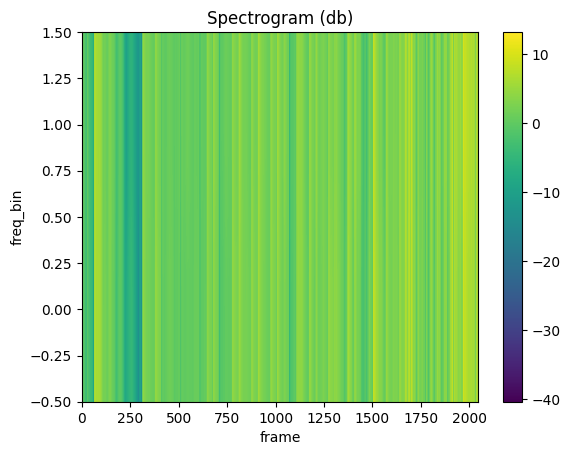

In [30]:
plot_spectrogram(spectrogram_list[50])
Audio(waveform_list[50], rate=sample_rate)

In [31]:
out_concatenate = list()

src=waveform_list[0]
tgt=spectrogram_list[0]
out = transformer_model(src, tgt)
out_concatenate.append(out)

for i in range(1,1681):
  src = waveform_list[i]
  src2 = out
  tgt = torch.cat((spectrogram_list[i-1],spectrogram_list[i]),1)
  out = transformer_model_secondario(src, src2, tgt)
  out = torch.tensor_split(out, 2, dim=1)
  out = out[1]
  if (1681-i)%50==0:
    print(1681-i,"segmenti rimanenti")
  out_concatenate.append(out)
  

1650 segmenti rimanenti
1600 segmenti rimanenti
1550 segmenti rimanenti
1500 segmenti rimanenti
1450 segmenti rimanenti
1400 segmenti rimanenti
1350 segmenti rimanenti
1300 segmenti rimanenti
1250 segmenti rimanenti
1200 segmenti rimanenti
1150 segmenti rimanenti
1100 segmenti rimanenti
1050 segmenti rimanenti
1000 segmenti rimanenti
